In [32]:
# import
import sklearn
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import graphviz
import matplotlib.pyplot as plt

In [4]:
# load data
vertebral = pd.read_csv('column_3C.dat', sep=' ', header=None)

In [21]:
vertebral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
0    310 non-null float64
1    310 non-null float64
2    310 non-null float64
3    310 non-null float64
4    310 non-null float64
5    310 non-null float64
6    310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


array(['DH', 'SL', 'NO'], dtype=object)

In [24]:
targets = vertebral.iloc[:, -1].unique()
targets

array(['DH', 'SL', 'NO'], dtype=object)

**preprocessing**

```python
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)
```

In [25]:
le = preprocessing.LabelEncoder()
le.fit(targets)

LabelEncoder()

**impurity measure**
- gini impurity
- entropy

**partition method**
- cross validation
- hold-out method

**hyper parameter to adjust**
- `min_samples_split`
- `min_samples_leaf`
- `min_weight_fraction_leaf`
- `max_leaf_nodes`
- `max_features`

In [7]:
def getLabelSprintPercentage(data, labeli):
    print(data.iloc[:, labeli].value_counts())

In [33]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# hold out method

In [34]:
def holdOutTreeResult(data, test_size, max_depth, criterion, random_state=42):
    train_set, test_set = train_test_split(data, test_size = test_size, random_state=random_state)
    train_X, train_y = train_set.iloc[:, :-1], train_set.iloc[:, -1]
    test_X, test_y = test_set.iloc[:, :-1], test_set.iloc[:, -1]
    train_y = le.transform(train_y)
    test_y = le.transform(test_y)
    
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    tree.fit(train_X, train_y)
    
    # export 
    dot_data = sklearn.tree.export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(''.join(['./result/handout ', str(test_size), criterion, 'max depth', str(max_depth)]), view=True)
    
    predict_y = tree.predict(test_X)
    # evaluate
    test_score = accuracy_score(test_y, predict_y)
    train_score = accuracy_score(train_y, tree.predict(train_X))
    
    # use confusion matrix to calculate accuracy for each category
    plot_confusion_matrix(test_y, predict_y, targets, True)   
    
    with open('result.csv', 'a') as f:
        f.write(','.join(['holdout', str(test_size), criterion, str(max_depth), str(test_score)]))
        f.write('\n')
    
    return tree

Normalized confusion matrix
[[0.66666667 0.33333333 0.        ]
 [0.25       0.75       0.        ]
 [0.         0.         1.        ]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Normalized confusion matrix
[[1.    0.    0.   ]
 [0.375 0.625 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[0.5   0.5   0.   ]
 [0.125 0.875 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[1.    0.    0.   ]
 [0.375 0.625 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[1.    0.    0.   ]
 [0.375 0.625 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[1.    0.    0.   ]
 [0.375 0.625 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.25       0.625      0.125     ]
 [0.         0.05882353 0.94117647]]
Normalized confusion matrix
[[1.    0.    0.   ]
 [0.375 0.625 0.   ]
 [0.    0.    1.   ]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.25       0.625      0.125     ]
 [0.     

/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.         1.         0.        ]
 [0.         0.97777778 0.02222222]
 [0.         0.03614458 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.51851852 0.48148148 0.        ]
 [0.26666667 0.71111111 0.02222222]
 [0.01204819 0.03614458 0.95180723]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.51851852 0.48148148 0.        ]
 [0.17777778 0.71111111 0.11111111]
 [0.         0.03614458 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.25925926 0.74074074 0.        ]
 [0.13333333 0.77777778 0.08888889]
 [0.01204819 0.02409639 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.51851852 0.48148148 0.        ]
 [0.17777778 0.73333333 0.08888889]
 [0.         0.03614458 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.22222222 0.74074074 0.03703704]
 [0.13333333 0.75555556 0.11111111]
 [0.01204819 0.02409639 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.2962963  0.7037037  0.        ]
 [0.15555556 0.73333333 0.11111111]
 [0.01204819 0.02409639 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.55555556 0.40740741 0.03703704]
 [0.13333333 0.75555556 0.11111111]
 [0.01204819 0.02409639 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.33333333 0.66666667 0.        ]
 [0.15555556 0.8        0.04444444]
 [0.01204819 0.02409639 0.96385542]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.57777778 0.42222222 0.        ]
 [0.4875     0.4875     0.025     ]
 [0.04065041 0.01626016 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.57777778 0.42222222 0.        ]
 [0.4875     0.4875     0.025     ]
 [0.04065041 0.01626016 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.55555556 0.44444444 0.        ]
 [0.275      0.7        0.025     ]
 [0.         0.05691057 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.66666667 0.33333333 0.        ]
 [0.275      0.7        0.025     ]
 [0.00813008 0.04878049 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.51111111 0.44444444 0.04444444]
 [0.25       0.675      0.075     ]
 [0.         0.05691057 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.6        0.37777778 0.02222222]
 [0.2875     0.6125     0.1       ]
 [0.00813008 0.02439024 0.96747967]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.42222222 0.53333333 0.04444444]
 [0.225      0.7        0.075     ]
 [0.         0.05691057 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.33333333 0.64444444 0.02222222]
 [0.1125     0.7875     0.1       ]
 [0.00813008 0.02439024 0.96747967]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.42222222 0.53333333 0.04444444]
 [0.225      0.7        0.075     ]
 [0.         0.05691057 0.94308943]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.44444444 0.53333333 0.02222222]
 [0.175      0.725      0.1       ]
 [0.00813008 0.02439024 0.96747967]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.72222222 0.27777778 0.        ]
 [0.3956044  0.58241758 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.61111111 0.38888889 0.        ]
 [0.46153846 0.51648352 0.02197802]
 [0.04477612 0.01492537 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.37037037 0.62962963 0.        ]
 [0.34065934 0.63736264 0.02197802]
 [0.02238806 0.03731343 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.64814815 0.35185185 0.        ]
 [0.25274725 0.72527473 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.53703704 0.46296296 0.        ]
 [0.2967033  0.68131868 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.64814815 0.35185185 0.        ]
 [0.25274725 0.72527473 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.37037037 0.62962963 0.        ]
 [0.34065934 0.63736264 0.02197802]
 [0.02238806 0.03731343 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.53703704 0.46296296 0.        ]
 [0.2967033  0.68131868 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.48148148 0.51851852 0.        ]
 [0.24175824 0.73626374 0.02197802]
 [0.00746269 0.05223881 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.64814815 0.35185185 0.        ]
 [0.25274725 0.72527473 0.02197802]
 [0.         0.05970149 0.94029851]]


/home/zinan/.pyenv/versions/3.6-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


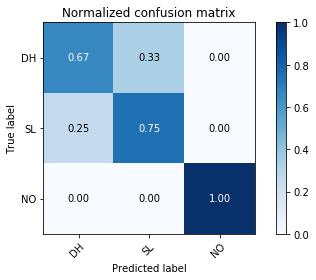

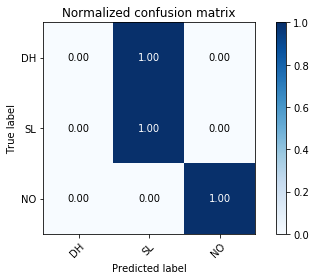

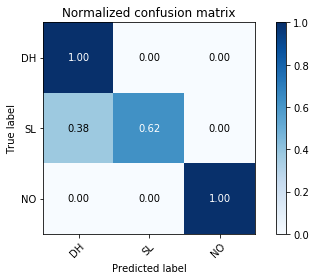

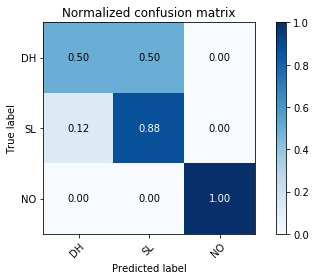

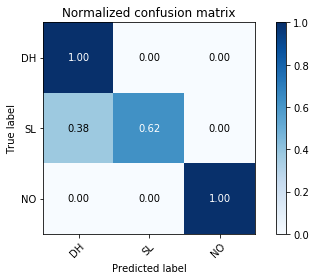

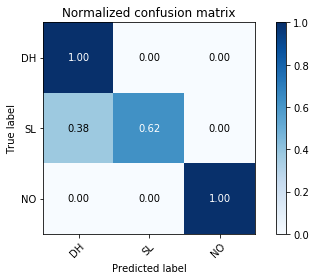

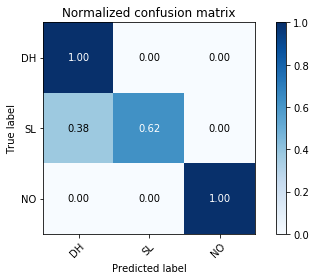

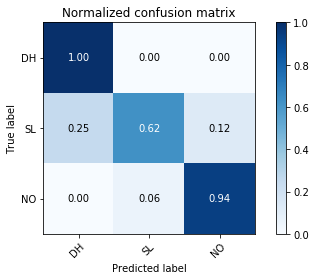

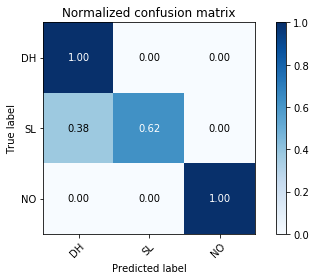

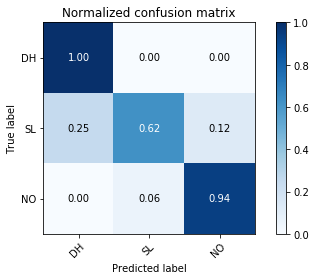

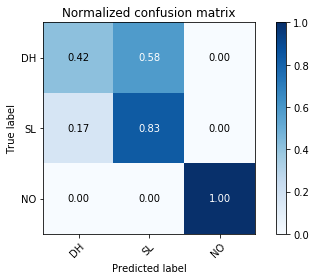

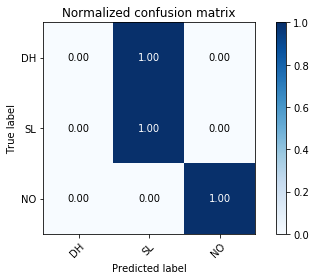

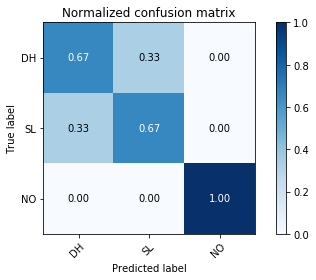

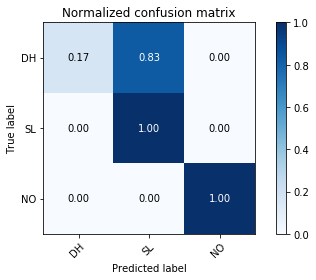

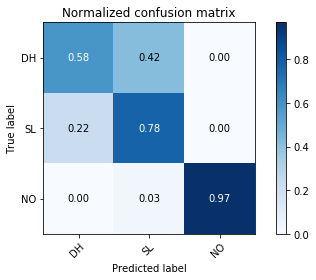

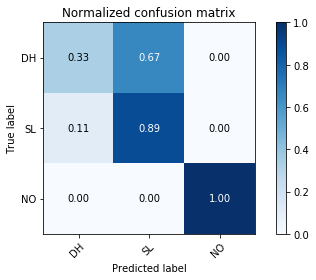

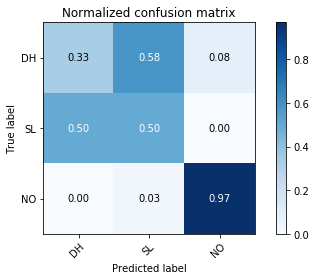

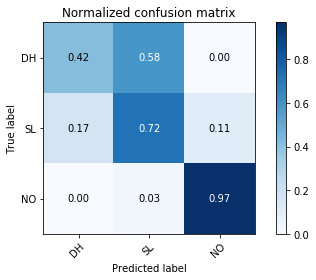

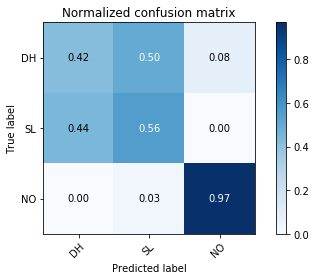

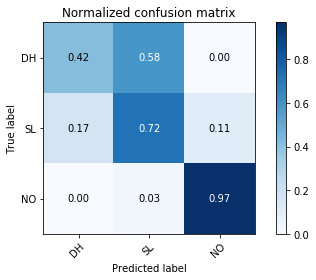

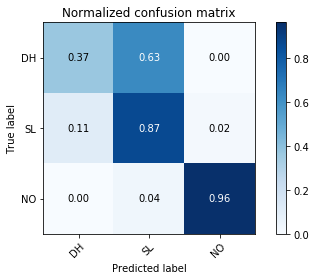

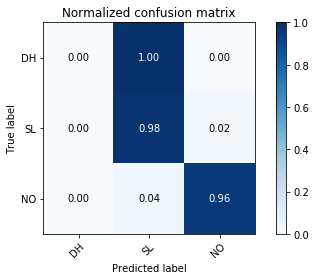

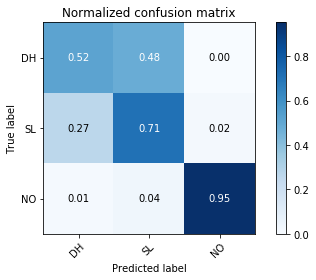

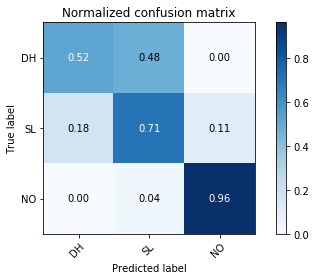

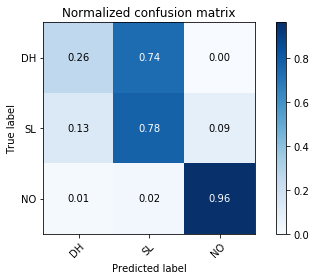

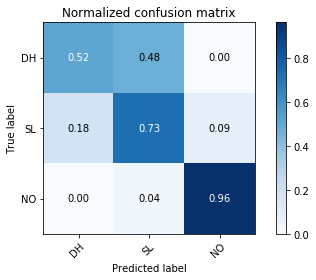

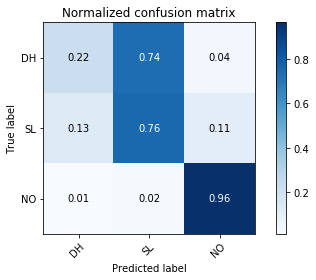

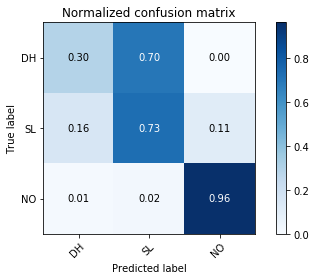

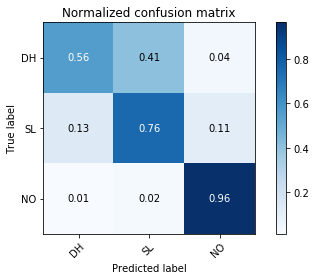

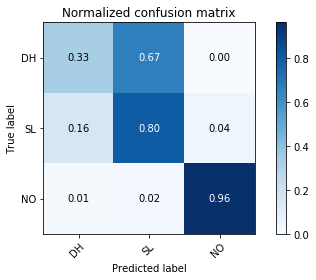

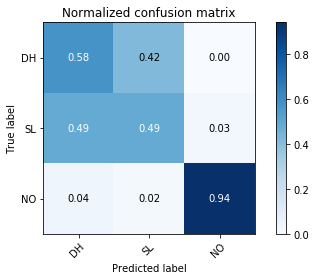

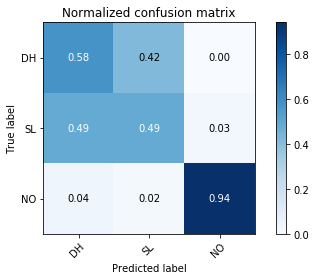

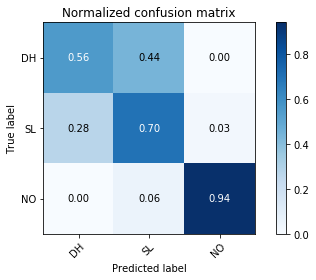

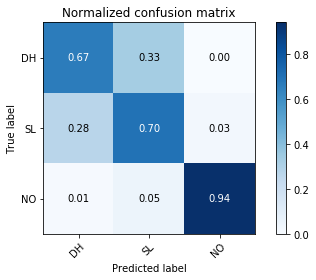

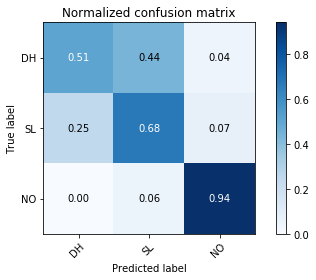

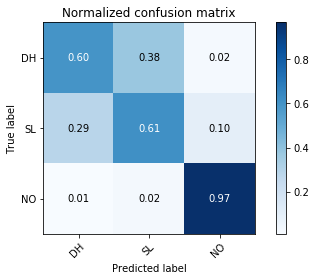

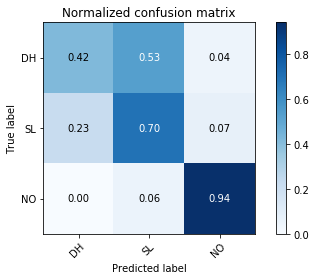

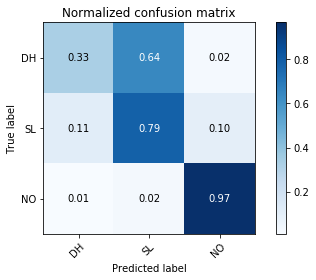

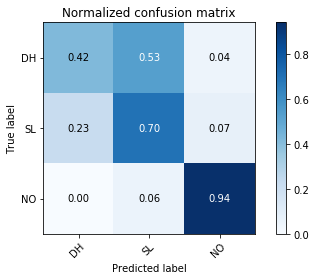

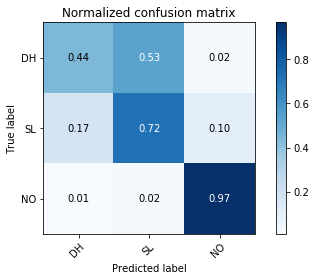

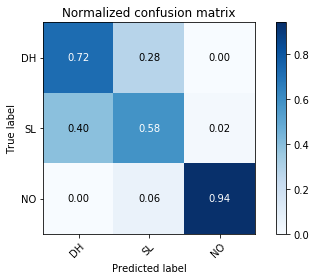

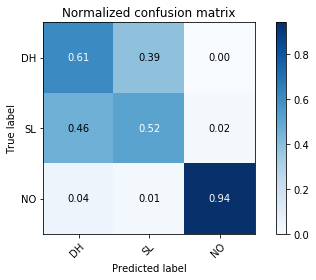

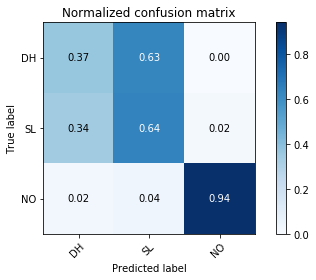

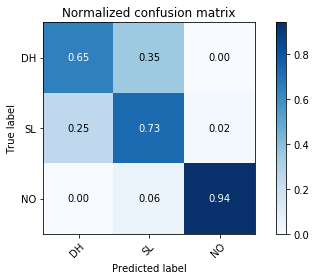

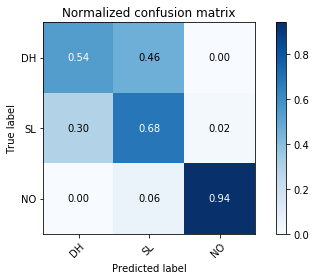

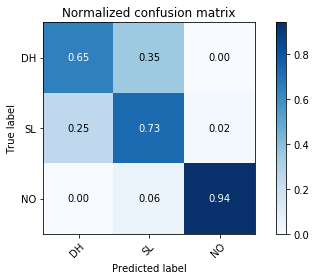

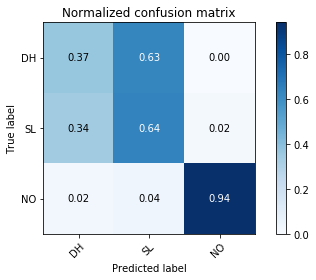

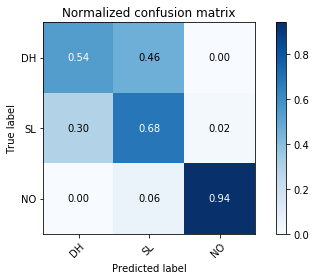

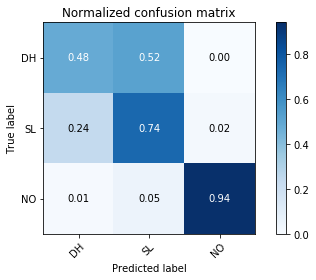

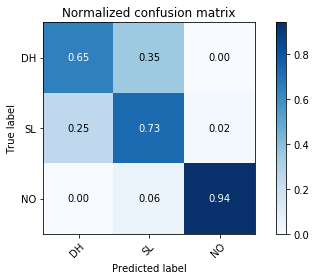

In [36]:
test_size = [0.1, 0.2, 0.5, 0.8, 0.9]
max_depth = list(range(2, 7))
criterions = ['gini', 'entropy']
for size in test_size:
    for depth in max_depth:
        for criterion in criterions:
            holdOutTreeResult(vertebral, size, depth, criterion)

# grid search

In [37]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = [
    {'criterion':['gini', 'entropy'], 'max_depth':[1, 2, 3, 4, 5], 'min_samples_split':[3, 4, 5, 6]}
]

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(vertebral.iloc[:, :-1], le.transform(vertebral.iloc[:, -1]))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.4885792437459402 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 3}
0.4885792437459402 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 4}
0.4885792437459402 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}
0.4885792437459402 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 6}
0.5111656508223583 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 3}
0.5111656508223583 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4}
0.5111656508223583 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5}
0.5111656508223583 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6}
0.4579054698896255 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}
0.4543694673976518 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4}
0.4543694673976518 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}
0.4543694673976518 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6}
0.4579054698896255 {'criteri